# Trabalho 1, 2 e 3

As 3 etapas solicitadas foram desenvolvidas através do estudo realizado no dataset https://www.kaggle.com/datasets/whenamancodes/predict-diabities. Por isso, todas as etapas solicitadas nos trabalhos encontram-se em um único Jupyter Notebook.

O projeto está dividido em:

- Etapa 1 - Análise exploratória
- Etapa 2 - Aplicando Regressão logistica e avaliando suas métricas
- Etapa 3 - AUTOML com H2O

## Etapa 1 - Considerar como trabalho 1

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Dicionário de dados


| Colunas  | Descrição|
|---|---|
| Pregnancies  |  Expressa a quantidade de gravidez |
| Glucose  |  Para expressar o nível de glicose no sangue |
| BloodPressure  | Para expressar a medição da pressão arterial  |
| SkinThickness  | Para expressar a espessura da pele |
| Insulin | Para expressar o nível de insulina no sangue |
| BMI | Para expressar o índice de massa corporal |
| DiabetesPedigreeFunction | Para expressar a porcentagem de Diabetes |
| Age | Para expressar a idade |
| Outcome | Para expressar o resultado final onde 1 é Sim e 0 é Não |




### Análise descritiva

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Importante notar os valores das estatísticas min, mediana (50%) e max de cada variável independente para encontrar dispersões muito grandes e/ou outliers.

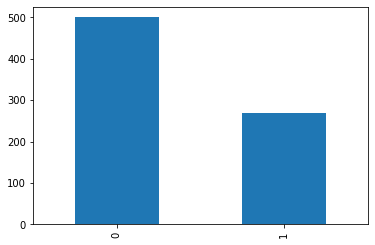

In [6]:
df.Outcome.value_counts().plot.bar()

Conforme demonstrado no plot acima, as classes estão desbalanceadas, podendo gerar predições pobres para a classe que está em menor quantidade.

#### Análise dos histogramas

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f178e8e9070>,
      dtype=object)

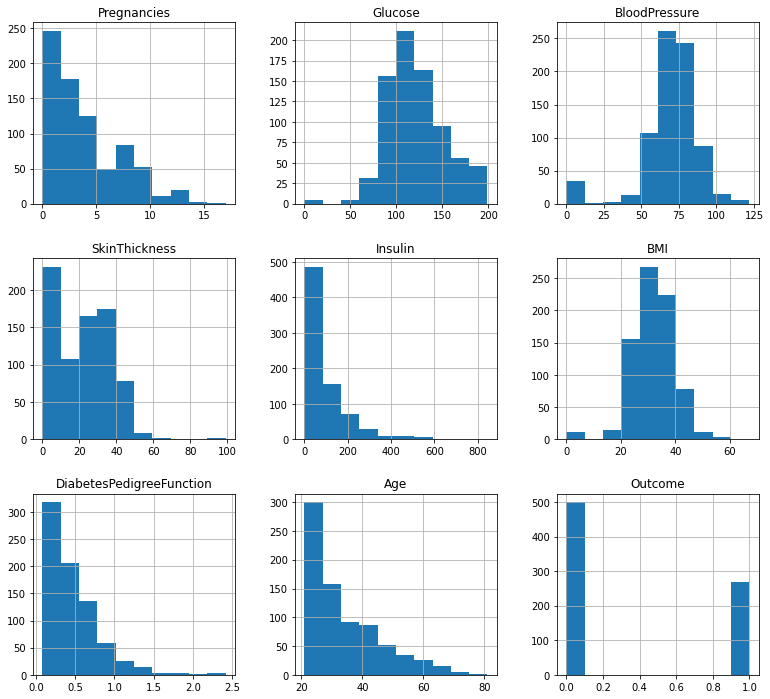

In [7]:
df.hist(figsize=(13, 12))

Distribuições que se aproximam de uma normal

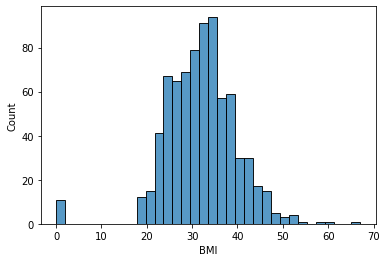

In [8]:
sns.histplot(data=df, x="BMI")

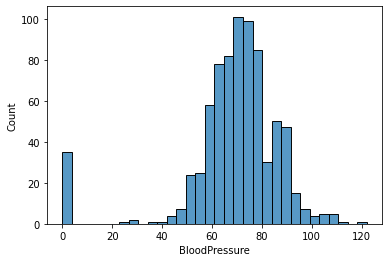

In [9]:
sns.histplot(data=df, x="BloodPressure")

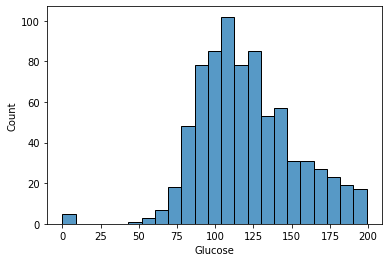

In [10]:
sns.histplot(data=df, x="Glucose")

#### BOXPLOTS PARA ANÁLISE DE DISPERSÃO

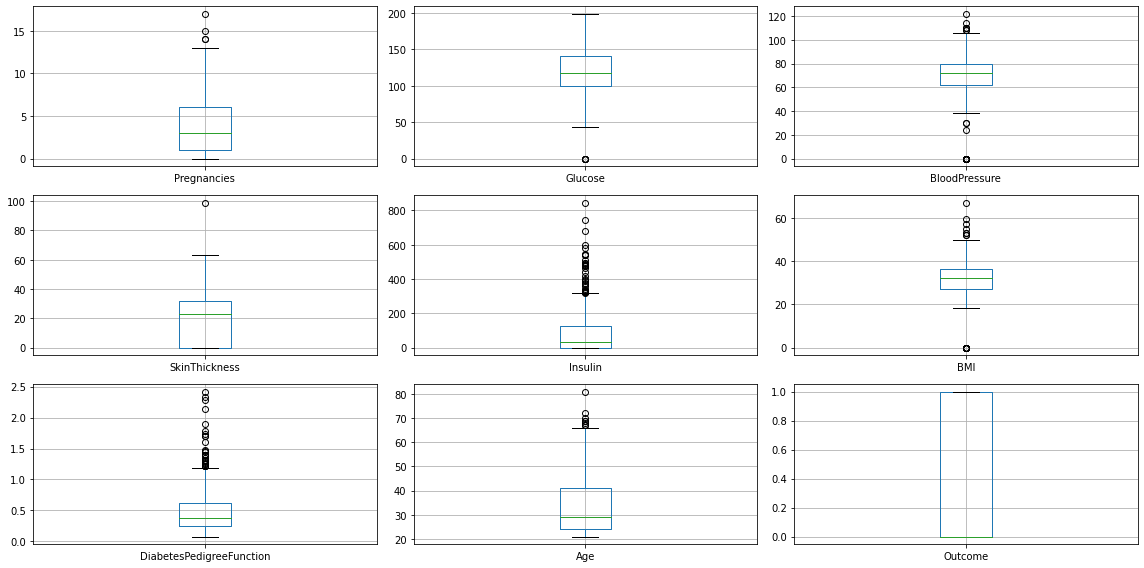

In [11]:
plt.figure(figsize=(16 , 8))
for i, col in enumerate(df.columns):
    plt.subplot(3, 3, i + 1)
    df.boxplot(col)
    plt.tight_layout()

Os boxplots acima mostram a variabilidade dos dados

#### Correlação

In [12]:
corr = df.corr()

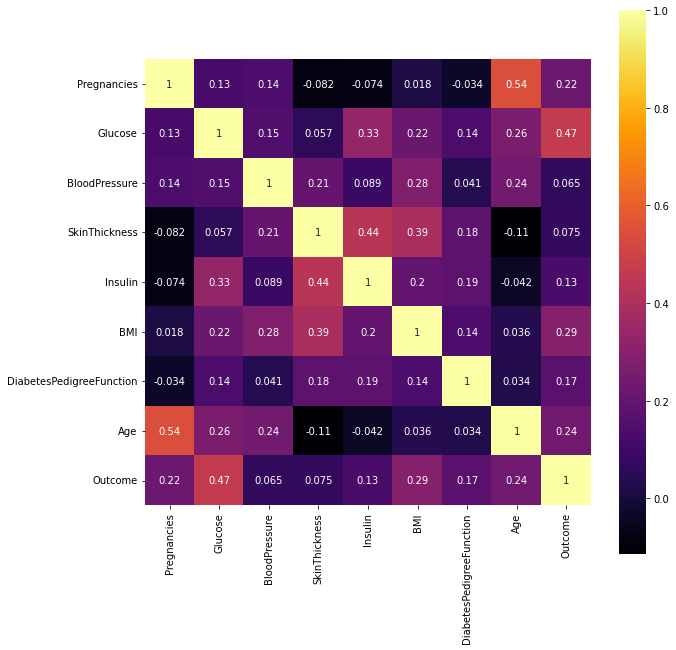

In [13]:
plt.figure(figsize=(10,10))
sns.heatmap(corr, vmax=1, square=True,annot=True,cmap='inferno')

In [14]:
important_features = ["Age", "BMI", "Glucose", "Pregnancies", "DiabetesPedigreeFunction"]

 #### Verificando as disribuições das preditoras separadamente entre as classes

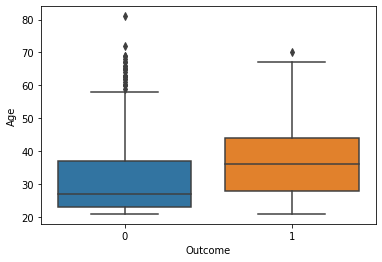

In [15]:
sns.boxplot(x='Outcome', y='Age', data=df)
plt.show()

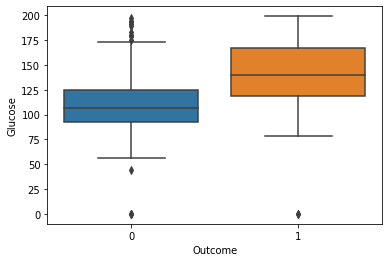

In [16]:
sns.boxplot(x='Outcome', y='Glucose', data=df)
plt.show()

Conforme observando no boxplot acima, pessoas com a Glicose mais alta, tendem a diabetes. Essa correlação pode ser confirmada no heatmap acima

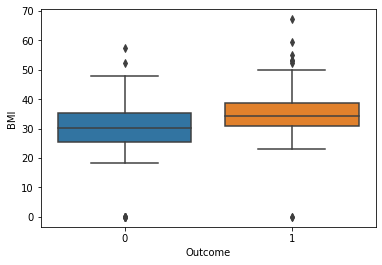

In [17]:
sns.boxplot(x='Outcome', y='BMI', data=df)
plt.show()

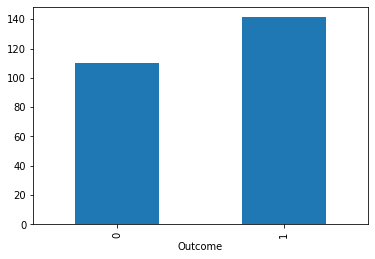

In [18]:
df.groupby('Outcome').Glucose.mean().plot(kind='bar');


Pessoas que possuem a glicose média >= 110, tendem a ser diabéticas.

### Conclusão

Conforme observado nos dados, temos um dataset sem valores faltantes e com baixo número de outliers. Está bem fácil notar correlações entre a variavel dependente com as independentes (Conforme análisado no heatmap de correlação e nas comparações de distribuição). Vale ressaltar que temos o número de classes desbalanceadadas, onde temos o número de casos Negativos (0) maior em relação ao número de casos Positivos (1). 

## Etapa 2 - Considerar como trabalho 2

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [20]:
clf = LogisticRegression(random_state = 42)
scaler = StandardScaler()

In [21]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Seleção das variáveis e divisão entre os conjuntos de teste e treino

In [22]:
X = df.drop("Outcome", axis=1)
y = df[["Outcome"]]

In [23]:
X.shape

(768, 8)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, 
                                                    random_state=42)

Tamanho do conjunto de testes definido em 15% arbitráriamente

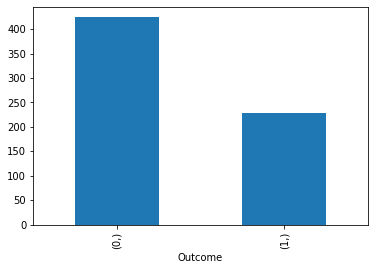

In [25]:
y_train.value_counts().plot.bar()

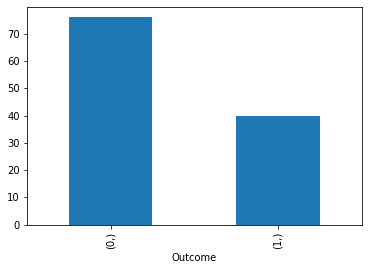

In [26]:
y_test.value_counts().plot.bar()

### Treinamento do modelo sem padronizar o conjunto de dados

In [27]:
clf.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [28]:
y_hat = clf.predict(X_test)

#### Avaliação do modelo sem padronizar o conjunto de dados

In [29]:
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.84      0.80      0.82        76
           1       0.65      0.70      0.67        40

    accuracy                           0.77       116
   macro avg       0.74      0.75      0.75       116
weighted avg       0.77      0.77      0.77       116



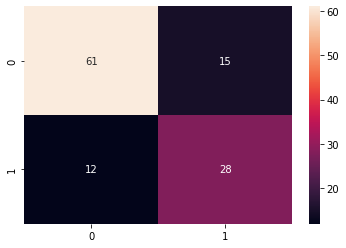

In [30]:
cm = confusion_matrix(y_test, y_hat)
sns.heatmap(cm, annot=True)

#### Conclusão

Conseguimos uma boa acruácia para predizer ambas às classes, porém, pela classe positiva (1) conter menos exemplos, a predição ficou mais pobre em relação a classe negativa (0).

### Treinamento do modelo com a padronização aplicada as features

In [31]:
X_scaled = scaler.fit_transform(X)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.15, 
                                                    random_state=42)

In [33]:
clf = LogisticRegression(random_state = 42)

In [34]:
clf.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(random_state=42)

#### Avaliação do modelo com o junto de dados padronizados

In [35]:
y_hat = clf.predict(X_test)

In [36]:
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.83      0.79      0.81        76
           1       0.64      0.70      0.67        40

    accuracy                           0.76       116
   macro avg       0.73      0.74      0.74       116
weighted avg       0.77      0.76      0.76       116



#### Conclusão

Não foi notado uma mudança significativa entre padronizar ou não os dados, o modelo conseguiu interpretar bem ambas opções.

## Etapa 3 - Considerar como trabalho 3

In [37]:
# !pip install h2o

In [38]:
import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.17" 2022-10-18; OpenJDK Runtime Environment (build 11.0.17+8-post-Ubuntu-1ubuntu218.04); OpenJDK 64-Bit Server VM (build 11.0.17+8-post-Ubuntu-1ubuntu218.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.8/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmprcq2fltz
  JVM stdout: /tmp/tmprcq2fltz/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmprcq2fltz/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,06 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.38.0.3
H2O_cluster_version_age:,27 days
H2O_cluster_name:,H2O_from_python_unknownUser_vpl4q4
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.172 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [39]:
df_h2o = h2o.import_file('diabetes.csv')

df_h2o['Outcome'] = df_h2o['Outcome'].asfactor()
train, test = df_h2o.split_frame(ratios=[0.85]) #85% para os dados de treino

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [40]:
df_h2o.head()

Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1
5,116,74,0,0,25.6,0.201,30,0
3,78,50,32,88,31,0.248,26,1
10,115,0,0,0,35.3,0.134,29,0
2,197,70,45,543,30.5,0.158,53,1
8,125,96,0,0,0,0.232,54,1


In [41]:
train.shape

(649, 9)

In [42]:
test.shape

(119, 9)

### Random forest

In [43]:
from h2o.estimators import H2ORandomForestEstimator

In [44]:
features = X.columns.values.tolist()

In [45]:
tree = H2ORandomForestEstimator(max_depth=3, seed=42)

tree.train(x=features, y='Outcome', training_frame=train, 
           validation_frame=test)

tree.model_performance(test)

drf Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


ModelMetricsBinomial: drf
** Reported on test data. **

MSE: 0.15820433239696352
RMSE: 0.39774908220756905
LogLoss: 0.486642532797519
Mean Per-Class Error: 0.208843329253366
AUC: 0.8580171358629131
AUCPR: 0.774258867756621
Gini: 0.7160342717258261

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.46894120670855044
       0    1    Error    Rate
-----  ---  ---  -------  ------------
0      69   7    0.0921   (7.0/76.0)
1      14   29   0.3256   (14.0/43.0)
Total  83   36   0.1765   (21.0/119.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.468941     0.734177  35
max f2                       0.197665     0.823755  88
max f0point5                 0.475911     0.782123  33
max accuracy                 0.475911     0.823529  33
max precision                0.766133     1         0
max recall                   0.197665     1         88
max specificity              0.766133     1         0
max absolute_mcc             0.468941     0.608986  35
max min_per_class_accuracy   0.406929     0.767442  46
max mean_per_class_accuracy  0.406929     0.791616  46
max tns                      0.766133     76        0
max fns                      0.766133     42        0
max fps                      0.085146     76        117
max tps                      0.197665     43        88
max tnr                      0.766133     1         0
max fnr                      0.766133     0.976744  0
max fpr                      0.085146     1         117
max tpr                      0.197665     1         88

Gains/Lift Table: Avg response rate: 36.13 %, avg score: 36.35 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score     cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  --------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0168067                   0.751615           2.76744   2.76744            1                0.759752  1                           0.759752            0.0465116       0.0465116                  176.744   176.744            0.0465116
2        0.0252101                   0.741864           2.76744   2.76744            1                0.743622  1                           0.754375            0.0232558       0.0697674                  176.744   176.744            0.0697674
3        0.0336134                   0.735512           2.76744   2.76744            1                0.738739  1                           0.750466            0.0232558       0.0930233                  176.744   176.744            0.0930233
4        0.0420168                   0.722243           0         2.21395            0                0.732763  0.8                         0.746925            0               0.0930233                  -100      121.395            0.0798654
5        0.0504202                   0.693019           2.76744   2.3062             1                0.718152  0.833333                    0.74213             0.0232558       0.116279                   176.744   130.62             0.103121
6        0.10084                     0.635085           2.76744   2.53682            1                0.663898  0.916667                    0.703014            0.139535        0.255814                   176.744   153.682            0.242656
7        0.151261                    0.582427           1.84496   2.3062             0.666667         0.600501  0.833333                    0.668843            0.0930233       0.348837                   84.4961   130.62             0.309364
8        0.201681                    0.53355            1.84496   2.

#### Conclusão

Tivemos um bom aumento na acurácia do modelo em comparação com a regressão logistica. Tentaremos outros valores de profundidade da árvore com GRID SEARCH.

### Random forest com GRID SEARCH

In [46]:
from h2o.grid.grid_search import H2OGridSearch

In [47]:
params = {'max_depth': [2,3,4,5,6]}
grid = H2OGridSearch(model=H2ORandomForestEstimator, hyper_params=params)

grid.train(features, 'Outcome', train, nfolds=5)
print(grid.get_grid(sort_by='accuracy', decreasing=True))

grid.models[0].model_performance(test)

drf Grid Build progress: |███████████████████████████████████████████████████████| (done) 100%
Hyper-Parameter Search Summary: ordered by decreasing accuracy
    max_depth    model_ids                                                     accuracy
--  -----------  ------------------------------------------------------------  ----------
    6            Grid_DRF_py_3_sid_9fc4_model_python_1671595841208_96_model_5  0.790447
    5            Grid_DRF_py_3_sid_9fc4_model_python_1671595841208_96_model_4  0.768875
    4            Grid_DRF_py_3_sid_9fc4_model_python_1671595841208_96_model_3  0.767334
    3            Grid_DRF_py_3_sid_9fc4_model_python_1671595841208_96_model_2  0.764253
    2            Grid_DRF_py_3_sid_9fc4_model_python_1671595841208_96_model_1  0.75963


ModelMetricsBinomial: drf
** Reported on test data. **

MSE: 0.150682089073954
RMSE: 0.38817790904938676
LogLoss: 0.46117962931873124
Mean Per-Class Error: 0.21144430844553241
AUC: 0.8567931456548348
AUCPR: 0.7587018374746664
Gini: 0.7135862913096696

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4343874019384384
       0    1    Error    Rate
-----  ---  ---  -------  ------------
0      58   18   0.2368   (18.0/76.0)
1      8    35   0.186    (8.0/43.0)
Total  66   53   0.2185   (26.0/119.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.434387     0.729167  52
max f2                       0.126988     0.81749   90
max f0point5                 0.554387     0.765027  34
max accuracy                 0.554387     0.815126  34
max precision                0.881006     1         0
max recall                   0.126988     1         90
max specificity              0.881006     1         0
max absolute_mcc             0.549396     0.590696  36
max min_per_class_accuracy   0.454509     0.776316  50
max mean_per_class_accuracy  0.434387     0.788556  52
max tns                      0.881006     76        0
max fns                      0.881006     42        0
max fps                      0.0111927    76        118
max tps                      0.126988     43        90
max tnr                      0.881006     1         0
max fnr                      0.881006     0.976744  0
max fpr                      0.0111927    1         118
max tpr                      0.126988     1         90

Gains/Lift Table: Avg response rate: 36.13 %, avg score: 37.79 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0168067                   0.865535           2.76744   2.76744            1                0.875082   1                           0.875082            0.0465116       0.0465116                  176.744   176.744            0.0465116
2        0.0252101                   0.847432           2.76744   2.76744            1                0.849028   1                           0.866398            0.0232558       0.0697674                  176.744   176.744            0.0697674
3        0.0336134                   0.842205           0         2.07558            0                0.844594   0.75                        0.860947            0               0.0697674                  -100      107.558            0.0566095
4        0.0420168                   0.821234           2.76744   2.21395            1                0.840169   0.8                         0.856791            0.0232558       0.0930233                  176.744   121.395            0.0798654
5        0.0504202                   0.795134           2.76744   2.3062             1                0.81387    0.833333                    0.849638            0.0232558       0.116279                   176.744   130.62             0.103121
6        0.10084                     0.752224           2.3062    2.3062             0.833333         0.774414   0.833333                    0.812026            0.116279        0.232558                   130.62    130.62             0.206242
7        0.151261                    0.667996           2.3062    2.3062             0.833333         0.705869   0.833333                    0.776641            0.116279        0.348837                   130.62    130.62             0.309364
8        0.201681                    0.629874           1

#### Conclusão

Como o aumento da profundidade das árvores, o modelo Random Forest não conseguiu generalizar valores nunca vistos com mais acurácia.

### AUTOML

In [48]:
from h2o.automl import H2OAutoML

In [49]:
aml = H2OAutoML(max_models=8, nfolds=5, seed=42)
aml.train(features, 'Outcome', train)

print(aml.leaderboard.head(8))

aml.get_best_model().model_performance(test)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
model_id                                                     auc    logloss     aucpr    mean_per_class_error      rmse       mse
StackedEnsemble_BestOfFamily_1_AutoML_1_20221221_41135  0.83434    0.483146  0.68915                 0.228538  0.396017  0.156829
StackedEnsemble_AllModels_1_AutoML_1_20221221_41135     0.829906   0.486051  0.674969                0.229628  0.398216  0.158576
GBM_4_AutoML_1_20221221_41135                           0.827521   0.488007  0.672559                0.239104  0.4023    0.161845
DRF_1_AutoML_1_20221221_41135                           0.821866   0.536117  0.680078                0.240419  0.401809  0.161451
GLM_1_AutoML_1_20221221_41135                           0.821745   0.49315   0.694547                0.242096  0.400797  0.160639
GBM_1_AutoML_1_20221221_41135                           0.818611   0.494383  0.663689                0.242552  0.405763  0.16

ModelMetricsBinomialGLM: stackedensemble
** Reported on test data. **

MSE: 0.14655403757466068
RMSE: 0.3828237682990186
LogLoss: 0.44835871161171575
AUC: 0.8589351285189718
AUCPR: 0.7728370433416273
Gini: 0.7178702570379436
Null degrees of freedom: 118
Residual degrees of freedom: 115
Null deviance: 155.80886679073578
Residual deviance: 106.70937336358838
AIC: 114.70937336358838

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3887361964959848
       0    1    Error    Rate
-----  ---  ---  -------  ------------
0      59   17   0.2237   (17.0/76.0)
1      7    36   0.1628   (7.0/43.0)
Total  66   53   0.2017   (24.0/119.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.388736     0.75      52
max f2                       0.181551     0.836653  78
max f0point5                 0.651759     0.72327   28
max accuracy                 0.388736     0.798319  52
max precision                0.903469     1         0
max recall                   0.101045     1         96
max specificity              0.903469     1         0
max absolute_mcc             0.388736     0.593012  52
max min_per_class_accuracy   0.401763     0.776316  50
max mean_per_class_accuracy  0.388736     0.806763  52
max tns                      0.903469     76        0
max fns                      0.903469     42        0
max fps                      0.00940813   76        118
max tps                      0.101045     43        96
max tnr                      0.903469     1         0
max fnr                      0.903469     0.976744  0
max fpr                      0.00940813   1         118
max tpr                      0.101045     1         96

Gains/Lift Table: Avg response rate: 36.13 %, avg score: 38.07 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0168067                   0.880242           2.76744   2.76744            1                0.892732   1                           0.892732            0.0465116       0.0465116                  176.744   176.744            0.0465116
2        0.0252101                   0.870374           2.76744   2.76744            1                0.872259   1                           0.885908            0.0232558       0.0697674                  176.744   176.744            0.0697674
3        0.0336134                   0.863125           2.76744   2.76744            1                0.867022   1                           0.881186            0.0232558       0.0930233                  176.744   176.744            0.0930233
4        0.0420168                   0.848784           0         2.21395            0                0.859805   0.8                         0.87691             0               0.0930233                  -100      121.395            0.0798654
5        0.0504202                   0.831604           2.76744   2.3062             1                0.844498   0.833333                    0.871508            0.0232558       0.116279                   176.744   130.62             0.103121
6        0.10084                     0.78656            2.76744   2.53682            1                0.806104   0.916667                    0.838806            0.139535        0.255814                   176.744   153.682            0.242656
7        0.151261                    0.737727           2.3062    2.45995            0.833333         0.763798   0.888889                    0.813803            0.1162

#### Conclusão

Os modelos escolhidos pelo AUTOML tiveram as performances parecidas com Random Forest, porém, levemente inferior.